In [1]:
import pandas as pd
from collections import defaultdict
from sklearn import metrics
import numpy as np
import sys

inbinfile='/Users/irffanalahi/Research/Research_code/gitignorefolder/MHB_per_read/softreadcounting/testtheidea/softRD_pileup/cd4bams_softRDpileup_nodupindex_binnedstats.txt'

outfile=inbinfile


consideringALLheyper=True


inbindf=pd.read_csv(inbinfile,sep="\t",index_col=0,low_memory=False)
scorecolumns=['CD4-others','CD8-others','nB-others','NK-others','Mn-others','mNeu-others','m8-others','DC-others','Eo-others','Tr-others','m4-others','Mg-others','Er-others','mB-others']


inbindf.head()

CD4-others  CD8-others  \
CD4.HWI-ST1450_140:7:1113:21311:32158#12        -0.107538    0.014513   
DC.HWI-ST537:222:C48Y0ACXX:5:1303:3330:45149    -0.107538    0.014513   
DC.HWI-ST731:132:C8F1WACXX:4:2310:8951:31721    -0.107538    0.014513   
m4.HWI-ST537:240:C6B3NACXX:3:2310:15483:54518   -0.107538    0.014513   
mNeu.HWI-ST731_20:3:2106:7915:23475#0           -0.107538    0.014513   

                                               nB-others  NK-others  \
CD4.HWI-ST1450_140:7:1113:21311:32158#12       -0.115436   0.782718   
DC.HWI-ST537:222:C48Y0ACXX:5:1303:3330:45149   -0.115436   0.782718   
DC.HWI-ST731:132:C8F1WACXX:4:2310:8951:31721   -0.115436   0.782718   
m4.HWI-ST537:240:C6B3NACXX:3:2310:15483:54518  -0.115436   0.782718   
mNeu.HWI-ST731_20:3:2106:7915:23475#0          -0.115436   0.782718   

                                               Mn-others  mNeu-others  \
CD4.HWI-ST1450_140:7:1113:21311:32158#12       -0.084564    -0.119026   
DC.HWI-ST537:222:C48Y0ACXX:5:1303:3330:45149   -0.084564    -0.119026   
DC.HWI-ST731:132:C8F1WACXX:4:2310:8951:31721   -0.084564    -0.119026   
m4.HWI-ST537:240:C6B3NACXX:3:2310:15483:54518  -0.084564    -0.119026   
mNeu.HWI-ST731_20:3:2106:7915:23475#0          -0.084564    -0.119026   

                                               m8-others  DC-others  \
CD4.HWI-ST1450_140:7:1113:21311:32158#12       -0.114359  -0.028205   
DC.HWI-ST537:222:C48Y0ACXX:5:1303:3330:45149   -0.114359  -0.028205   
DC.HWI-ST731:132:C8F1WACXX:4:2310:8951:31721   -0.114359  -0.028205   
m4.HWI-ST537:240:C6B3NACXX:3:2310:15483:54518  -0.114359  -0.028205   
mNeu.HWI-ST731_20:3:2106:7915:23475#0          -0.114359  -0.028205   

                                               Eo-others  Tr-others  ...  \
CD4.HWI-ST1450_140:7:1113:21311:32158#12       -0.031974  -0.102513  ...   
DC.HWI-ST537:222:C48Y0ACXX:5:1303:3330:45149   -0.031974  -0.102513  ...   
DC.HWI-ST731:132:C8F1WACXX:4:2310:8951:31721   -0.031974  -0.102513  ...   
m4.HWI-ST537:240:C6B3NACXX:3:2310:15483:54518  -0.031974  -0.102513  ...   
mNeu.HWI-ST731_20:3:2106:7915:23475#0          -0.031974  -0.102513  ...   

                                               hyperCpG  LENhyperCpG  \
CD4.HWI-ST1450_140:7:1113:21311:32158#12            NaN          0.0   
DC.HWI-ST537:222:C48Y0ACXX:5:1303:3330:45149        NaN          0.0   
DC.HWI-ST731:132:C8F1WACXX:4:2310:8951:31721        NaN          0.0   
m4.HWI-ST537:240:C6B3NACXX:3:2310:15483:54518       NaN          0.0   
mNeu.HWI-ST731_20:3:2106:7915:23475#0               NaN          0.0   

                                               total_cpg  \
CD4.HWI-ST1450_140:7:1113:21311:32158#12             1.0   
DC.HWI-ST537:222:C48Y0ACXX:5:1303:3330:45149         1.0   
DC.HWI-ST731:132:C8F1WACXX:4:2310:8951:31721         1.0   
m4.HWI-ST537:240:C6B3NACXX:3:2310:15483:54518        1.0   
mNeu.HWI-ST731_20:3:2106:7915:23475#0                1.0   

                                               LENhypoCpG_BY_total_cpg  \
CD4.HWI-ST1450_140:7:1113:21311:32158#12                           1.0   
DC.HWI-ST537:222:C48Y0ACXX:5:1303:3330:45149                       1.0   
DC.HWI-ST731:132:C8F1WACXX:4:2310:8951:31721                       1.0   
m4.HWI-ST537:240:C6B3NACXX:3:2310:15483:54518                      1.0   
mNeu.HWI-ST731_20:3:2106:7915:23475#0                              1.0   

                                              maxscoredCT_beforeCpGweight  \
CD4.HWI-ST1450_140:7:1113:21311:32158#12                        NK-others   
DC.HWI-ST537:222:C48Y0ACXX:5:1303:3330:45149                    NK-others   
DC.HWI-ST731:132:C8F1WACXX:4:2310:8951:31721                    NK-others   
m4.HWI-ST537:240:C6B3NACXX:3:2310:15483:54518                   NK-others   
mNeu.HWI-ST731_20:3:2106:7915:23475#0                           NK-others   

                                               maxscore_beforeCpGweight  \
CD4.HWI-ST1450_140:7:1113:21311:32158#12                       0.782718   
DC.HWI

In [2]:
if consideringALLheyper==True:
    allassigned=inbindf.copy()


elif consideringALLheyper==False:
    allassigned=inbindf[inbindf['deltabasedfragassignment']!='NotAssigned'].copy()
    
else:
    print("wrong input")
    sys.exit(1)
#
allassigned.head()

CD4-others  CD8-others  \
CD4.HWI-ST1450_140:7:1113:21311:32158#12        -0.107538    0.014513   
DC.HWI-ST537:222:C48Y0ACXX:5:1303:3330:45149    -0.107538    0.014513   
DC.HWI-ST731:132:C8F1WACXX:4:2310:8951:31721    -0.107538    0.014513   
m4.HWI-ST537:240:C6B3NACXX:3:2310:15483:54518   -0.107538    0.014513   
mNeu.HWI-ST731_20:3:2106:7915:23475#0           -0.107538    0.014513   

                                               nB-others  NK-others  \
CD4.HWI-ST1450_140:7:1113:21311:32158#12       -0.115436   0.782718   
DC.HWI-ST537:222:C48Y0ACXX:5:1303:3330:45149   -0.115436   0.782718   
DC.HWI-ST731:132:C8F1WACXX:4:2310:8951:31721   -0.115436   0.782718   
m4.HWI-ST537:240:C6B3NACXX:3:2310:15483:54518  -0.115436   0.782718   
mNeu.HWI-ST731_20:3:2106:7915:23475#0          -0.115436   0.782718   

                                               Mn-others  mNeu-others  \
CD4.HWI-ST1450_140:7:1113:21311:32158#12       -0.084564    -0.119026   
DC.HWI-ST537:222:C48Y0ACXX:5:1303:3330:45149   -0.084564    -0.119026   
DC.HWI-ST731:132:C8F1WACXX:4:2310:8951:31721   -0.084564    -0.119026   
m4.HWI-ST537:240:C6B3NACXX:3:2310:15483:54518  -0.084564    -0.119026   
mNeu.HWI-ST731_20:3:2106:7915:23475#0          -0.084564    -0.119026   

                                               m8-others  DC-others  \
CD4.HWI-ST1450_140:7:1113:21311:32158#12       -0.114359  -0.028205   
DC.HWI-ST537:222:C48Y0ACXX:5:1303:3330:45149   -0.114359  -0.028205   
DC.HWI-ST731:132:C8F1WACXX:4:2310:8951:31721   -0.114359  -0.028205   
m4.HWI-ST537:240:C6B3NACXX:3:2310:15483:54518  -0.114359  -0.028205   
mNeu.HWI-ST731_20:3:2106:7915:23475#0          -0.114359  -0.028205   

                                               Eo-others  Tr-others  ...  \
CD4.HWI-ST1450_140:7:1113:21311:32158#12       -0.031974  -0.102513  ...   
DC.HWI-ST537:222:C48Y0ACXX:5:1303:3330:45149   -0.031974  -0.102513  ...   
DC.HWI-ST731:132:C8F1WACXX:4:2310:8951:31721   -0.031974  -0.102513  ...   
m4.HWI-ST537:240:C6B3NACXX:3:2310:15483:54518  -0.031974  -0.102513  ...   
mNeu.HWI-ST731_20:3:2106:7915:23475#0          -0.031974  -0.102513  ...   

                                               hyperCpG  LENhyperCpG  \
CD4.HWI-ST1450_140:7:1113:21311:32158#12            NaN          0.0   
DC.HWI-ST537:222:C48Y0ACXX:5:1303:3330:45149        NaN          0.0   
DC.HWI-ST731:132:C8F1WACXX:4:2310:8951:31721        NaN          0.0   
m4.HWI-ST537:240:C6B3NACXX:3:2310:15483:54518       NaN          0.0   
mNeu.HWI-ST731_20:3:2106:7915:23475#0               NaN          0.0   

                                               total_cpg  \
CD4.HWI-ST1450_140:7:1113:21311:32158#12             1.0   
DC.HWI-ST537:222:C48Y0ACXX:5:1303:3330:45149         1.0   
DC.HWI-ST731:132:C8F1WACXX:4:2310:8951:31721         1.0   
m4.HWI-ST537:240:C6B3NACXX:3:2310:15483:54518        1.0   
mNeu.HWI-ST731_20:3:2106:7915:23475#0                1.0   

                                               LENhypoCpG_BY_total_cpg  \
CD4.HWI-ST1450_140:7:1113:21311:32158#12                           1.0   
DC.HWI-ST537:222:C48Y0ACXX:5:1303:3330:45149                       1.0   
DC.HWI-ST731:132:C8F1WACXX:4:2310:8951:31721                       1.0   
m4.HWI-ST537:240:C6B3NACXX:3:2310:15483:54518                      1.0   
mNeu.HWI-ST731_20:3:2106:7915:23475#0                              1.0   

                                              maxscoredCT_beforeCpGweight  \
CD4.HWI-ST1450_140:7:1113:21311:32158#12                        NK-others   
DC.HWI-ST537:222:C48Y0ACXX:5:1303:3330:45149                    NK-others   
DC.HWI-ST731:132:C8F1WACXX:4:2310:8951:31721                    NK-others   
m4.HWI-ST537:240:C6B3NACXX:3:2310:15483:54518                   NK-others   
mNeu.HWI-ST731_20:3:2106:7915:23475#0                           NK-others   

                                               maxscore_beforeCpGweight  \
CD4.HWI-ST1450_140:7:1113:21311:32158#12                       0.782718   
DC.HWI

In [3]:
allassigned.loc[inbindf['deltabasedfragassignment']=='NotAssigned','deltabasedfragassignment']=allassigned.loc[inbindf['deltabasedfragassignment']=='NotAssigned','maxscoredCT_beforeCpGweight']

In [4]:
allassigned['secondmaxScore']='Notassigned'
allassigned['secondmaxScoreCT']='Notassigned'
allassigned.head()

CD4-others  CD8-others  \
CD4.HWI-ST1450_140:7:1113:21311:32158#12        -0.107538    0.014513   
DC.HWI-ST537:222:C48Y0ACXX:5:1303:3330:45149    -0.107538    0.014513   
DC.HWI-ST731:132:C8F1WACXX:4:2310:8951:31721    -0.107538    0.014513   
m4.HWI-ST537:240:C6B3NACXX:3:2310:15483:54518   -0.107538    0.014513   
mNeu.HWI-ST731_20:3:2106:7915:23475#0           -0.107538    0.014513   

                                               nB-others  NK-others  \
CD4.HWI-ST1450_140:7:1113:21311:32158#12       -0.115436   0.782718   
DC.HWI-ST537:222:C48Y0ACXX:5:1303:3330:45149   -0.115436   0.782718   
DC.HWI-ST731:132:C8F1WACXX:4:2310:8951:31721   -0.115436   0.782718   
m4.HWI-ST537:240:C6B3NACXX:3:2310:15483:54518  -0.115436   0.782718   
mNeu.HWI-ST731_20:3:2106:7915:23475#0          -0.115436   0.782718   

                                               Mn-others  mNeu-others  \
CD4.HWI-ST1450_140:7:1113:21311:32158#12       -0.084564    -0.119026   
DC.HWI-ST537:222:C48Y0ACXX:5:1303:3330:45149   -0.084564    -0.119026   
DC.HWI-ST731:132:C8F1WACXX:4:2310:8951:31721   -0.084564    -0.119026   
m4.HWI-ST537:240:C6B3NACXX:3:2310:15483:54518  -0.084564    -0.119026   
mNeu.HWI-ST731_20:3:2106:7915:23475#0          -0.084564    -0.119026   

                                               m8-others  DC-others  \
CD4.HWI-ST1450_140:7:1113:21311:32158#12       -0.114359  -0.028205   
DC.HWI-ST537:222:C48Y0ACXX:5:1303:3330:45149   -0.114359  -0.028205   
DC.HWI-ST731:132:C8F1WACXX:4:2310:8951:31721   -0.114359  -0.028205   
m4.HWI-ST537:240:C6B3NACXX:3:2310:15483:54518  -0.114359  -0.028205   
mNeu.HWI-ST731_20:3:2106:7915:23475#0          -0.114359  -0.028205   

                                               Eo-others  Tr-others  ...  \
CD4.HWI-ST1450_140:7:1113:21311:32158#12       -0.031974  -0.102513  ...   
DC.HWI-ST537:222:C48Y0ACXX:5:1303:3330:45149   -0.031974  -0.102513  ...   
DC.HWI-ST731:132:C8F1WACXX:4:2310:8951:31721   -0.031974  -0.102513  ...   
m4.HWI-ST537:240:C6B3NACXX:3:2310:15483:54518  -0.031974  -0.102513  ...   
mNeu.HWI-ST731_20:3:2106:7915:23475#0          -0.031974  -0.102513  ...   

                                               total_cpg  \
CD4.HWI-ST1450_140:7:1113:21311:32158#12             1.0   
DC.HWI-ST537:222:C48Y0ACXX:5:1303:3330:45149         1.0   
DC.HWI-ST731:132:C8F1WACXX:4:2310:8951:31721         1.0   
m4.HWI-ST537:240:C6B3NACXX:3:2310:15483:54518        1.0   
mNeu.HWI-ST731_20:3:2106:7915:23475#0                1.0   

                                               LENhypoCpG_BY_total_cpg  \
CD4.HWI-ST1450_140:7:1113:21311:32158#12                           1.0   
DC.HWI-ST537:222:C48Y0ACXX:5:1303:3330:45149                       1.0   
DC.HWI-ST731:132:C8F1WACXX:4:2310:8951:31721                       1.0   
m4.HWI-ST537:240:C6B3NACXX:3:2310:15483:54518                      1.0   
mNeu.HWI-ST731_20:3:2106:7915:23475#0                              1.0   

                                               maxscoredCT_beforeCpGweight  \
CD4.HWI-ST1450_140:7:1113:21311:32158#12                         NK-others   
DC.HWI-ST537:222:C48Y0ACXX:5:1303:3330:45149                     NK-others   
DC.HWI-ST731:132:C8F1WACXX:4:2310:8951:31721                     NK-others   
m4.HWI-ST537:240:C6B3NACXX:3:2310:15483:54518                    NK-others   
mNeu.HWI-ST731_20:3:2106:7915:23475#0                            NK-others   

                                               maxscore_beforeCpGweight  \
CD4.HWI-ST1450_140:7:1113:21311:32158#12                       0.782718   
DC.HWI-ST537:222:C48Y0ACXX:5:1303:3330:45149                   0.782718   
DC.HWI-ST731:132:C8F1WACXX:4:2310:8951:31721                   0.782718   
m4.HWI-ST537:240:C6B3NACXX:3:2310:15483:54518                  0.782718   
mNeu.HWI-ST731_20:3:2106:7915:23475#0                          0.782718   

                                              maxscoredCT  maxscore  \
CD4.HWI-ST1450_140:7:1113:21311:32158#12        NK-others  0.

In [5]:
grouped=allassigned.groupby('maxscoredCT')

for name, group in grouped:
    
    
    tempscorecolumns=scorecolumns.copy()
    
    tempscorecolumns.remove(name)
    
    allassigned.loc[group.index,'secondmaxScore']=group[tempscorecolumns].max(axis=1)
    allassigned.loc[group.index,'secondmaxScoreCT']=(group[tempscorecolumns]).idxmax(axis=1)
   

In [6]:
allassigned['adjustedScore_minus']=allassigned['maxscore']-allassigned['secondmaxScore']
allassigned['adjustedScore_minus_avg']=(allassigned['maxscore']+(allassigned['maxscore']-allassigned['secondmaxScore']))/2
allassigned.head()

CD4-others  CD8-others  \
CD4.HWI-ST1450_140:7:1113:21311:32158#12        -0.107538    0.014513   
DC.HWI-ST537:222:C48Y0ACXX:5:1303:3330:45149    -0.107538    0.014513   
DC.HWI-ST731:132:C8F1WACXX:4:2310:8951:31721    -0.107538    0.014513   
m4.HWI-ST537:240:C6B3NACXX:3:2310:15483:54518   -0.107538    0.014513   
mNeu.HWI-ST731_20:3:2106:7915:23475#0           -0.107538    0.014513   

                                               nB-others  NK-others  \
CD4.HWI-ST1450_140:7:1113:21311:32158#12       -0.115436   0.782718   
DC.HWI-ST537:222:C48Y0ACXX:5:1303:3330:45149   -0.115436   0.782718   
DC.HWI-ST731:132:C8F1WACXX:4:2310:8951:31721   -0.115436   0.782718   
m4.HWI-ST537:240:C6B3NACXX:3:2310:15483:54518  -0.115436   0.782718   
mNeu.HWI-ST731_20:3:2106:7915:23475#0          -0.115436   0.782718   

                                               Mn-others  mNeu-others  \
CD4.HWI-ST1450_140:7:1113:21311:32158#12       -0.084564    -0.119026   
DC.HWI-ST537:222:C48Y0ACXX:5:1303:3330:45149   -0.084564    -0.119026   
DC.HWI-ST731:132:C8F1WACXX:4:2310:8951:31721   -0.084564    -0.119026   
m4.HWI-ST537:240:C6B3NACXX:3:2310:15483:54518  -0.084564    -0.119026   
mNeu.HWI-ST731_20:3:2106:7915:23475#0          -0.084564    -0.119026   

                                               m8-others  DC-others  \
CD4.HWI-ST1450_140:7:1113:21311:32158#12       -0.114359  -0.028205   
DC.HWI-ST537:222:C48Y0ACXX:5:1303:3330:45149   -0.114359  -0.028205   
DC.HWI-ST731:132:C8F1WACXX:4:2310:8951:31721   -0.114359  -0.028205   
m4.HWI-ST537:240:C6B3NACXX:3:2310:15483:54518  -0.114359  -0.028205   
mNeu.HWI-ST731_20:3:2106:7915:23475#0          -0.114359  -0.028205   

                                               Eo-others  Tr-others  ...  \
CD4.HWI-ST1450_140:7:1113:21311:32158#12       -0.031974  -0.102513  ...   
DC.HWI-ST537:222:C48Y0ACXX:5:1303:3330:45149   -0.031974  -0.102513  ...   
DC.HWI-ST731:132:C8F1WACXX:4:2310:8951:31721   -0.031974  -0.102513  ...   
m4.HWI-ST537:240:C6B3NACXX:3:2310:15483:54518  -0.031974  -0.102513  ...   
mNeu.HWI-ST731_20:3:2106:7915:23475#0          -0.031974  -0.102513  ...   

                                               maxscoredCT_beforeCpGweight  \
CD4.HWI-ST1450_140:7:1113:21311:32158#12                         NK-others   
DC.HWI-ST537:222:C48Y0ACXX:5:1303:3330:45149                     NK-others   
DC.HWI-ST731:132:C8F1WACXX:4:2310:8951:31721                     NK-others   
m4.HWI-ST537:240:C6B3NACXX:3:2310:15483:54518                    NK-others   
mNeu.HWI-ST731_20:3:2106:7915:23475#0                            NK-others   

                                               maxscore_beforeCpGweight  \
CD4.HWI-ST1450_140:7:1113:21311:32158#12                       0.782718   
DC.HWI-ST537:222:C48Y0ACXX:5:1303:3330:45149                   0.782718   
DC.HWI-ST731:132:C8F1WACXX:4:2310:8951:31721                   0.782718   
m4.HWI-ST537:240:C6B3NACXX:3:2310:15483:54518                  0.782718   
mNeu.HWI-ST731_20:3:2106:7915:23475#0                          0.782718   

                                               maxscoredCT  maxscore  \
CD4.HWI-ST1450_140:7:1113:21311:32158#12         NK-others  0.782718   
DC.HWI-ST537:222:C48Y0ACXX:5:1303:3330:45149     NK-others  0.782718   
DC.HWI-ST731:132:C8F1WACXX:4:2310:8951:31721     NK-others  0.782718   
m4.HWI-ST537:240:C6B3NACXX:3:2310:15483:54518    NK-others  0.782718   
mNeu.HWI-ST731_20:3:2106:7915:23475#0            NK-others  0.782718   

                                              deltabasedfragassignment  \
CD4.HWI-ST1450_140:7:1113:21311:32158#12                     NK-others   
DC.HWI-ST537:222:C48Y0ACXX:5:1303:3330:45149                 NK-others   
DC.HWI-ST731:132:C8F1WACXX:4:2310:8951:31721                 NK-others   
m4.HWI-ST537:240:C6B3NACXX:3:2310:15483:54518                NK-others   
mNeu.HWI-ST731_20:3:2106:7915:23475#0                        NK-others   

                                                            

In [7]:
allassigned.columns

Index(['CD4-others', 'CD8-others', 'nB-others', 'NK-others', 'Mn-others',
       'mNeu-others', 'm8-others', 'DC-others', 'Eo-others', 'Tr-others',
       'm4-others', 'Mg-others', 'Er-others', 'mB-others', 'hypoCpG',
       'LENhypoCpG', 'hyperCpG', 'LENhyperCpG', 'total_cpg',
       'LENhypoCpG_BY_total_cpg', 'maxscoredCT_beforeCpGweight',
       'maxscore_beforeCpGweight', 'maxscoredCT', 'maxscore',
       'deltabasedfragassignment', 'filename', 'secondmaxScore',
       'secondmaxScoreCT', 'adjustedScore_minus', 'adjustedScore_minus_avg'],
      dtype='object')

In [8]:
adjustedScore_minus0val=list(set(allassigned[allassigned['LENhypoCpG_BY_total_cpg']==0]['adjustedScore_minus'].tolist()))
if len(adjustedScore_minus0val)==0:
    pass
elif len(adjustedScore_minus0val)!=1 or adjustedScore_minus0val[0]!=0:
    print(adjustedScore_minus0val)
    sys.exit(1)
    

In [9]:



adjustedScore_minus_avg0val=list(set(allassigned[allassigned['LENhypoCpG_BY_total_cpg']==0]['adjustedScore_minus_avg'].tolist()))


if len(adjustedScore_minus_avg0val)==0:
    pass

elif len(adjustedScore_minus_avg0val)!=1 or adjustedScore_minus_avg0val[0]!=0:
    print(adjustedScore_minus_avg0val)
    sys.exit(1)
    

In [10]:
allassigned['LENhypoCpG_0.8']=0
allassigned.loc[allassigned['LENhypoCpG_BY_total_cpg']>=0.8,'LENhypoCpG_0.8']=allassigned.loc[allassigned['LENhypoCpG_BY_total_cpg']>=0.8,'LENhypoCpG']

In [11]:
allassigned['LENhypoCpG_0.5']=0
allassigned.loc[allassigned['LENhypoCpG_BY_total_cpg']>=0.5,'LENhypoCpG_0.5']=allassigned.loc[allassigned['LENhypoCpG_BY_total_cpg']>=0.5,'LENhypoCpG']

In [12]:




def calculate_metrics(currentgroup,currentmethods):
    for name, group in currentgroup:
   
        celltype=name.replace('-others','')





        y=(group.index.str.contains(celltype)).astype(int) 


        for method in currentmethods:

            pred=(group[method]).to_numpy()


            fpr, tpr, thresholds=metrics.roc_curve(y,pred,pos_label=1)


            tempAUC=metrics.auc(fpr, tpr)

            celltypeAUC[celltype]=celltypeAUC[celltype]+[tempAUC]

            optimal_idx = np.argmax(tpr - fpr)
            optimal_threshold = thresholds[optimal_idx]
            celltypeoptcutpoint[celltype]=celltypeoptcutpoint[celltype]+[optimal_threshold]

In [13]:



celltypeAUC=defaultdict(list)
celltypeoptcutpoint=defaultdict(list)


allassignedgrouped=allassigned.groupby('deltabasedfragassignment')


methods=['maxscore','adjustedScore_minus','adjustedScore_minus_avg','LENhypoCpG','LENhypoCpG_0.5','LENhypoCpG_0.8']

calculate_metrics(allassignedgrouped,methods)




In [14]:
celltypeAUCdf=pd.DataFrame.from_dict(celltypeAUC, orient='index',columns=methods)
celltypeAUCdf.index.name = 'Celltype'
celltypeAUCdf.head()

maxscore  adjustedScore_minus  adjustedScore_minus_avg  LENhypoCpG  \
Celltype                                                                       
CD4       0.749101             0.747708                 0.750016    0.731459   
CD8       0.844389             0.844440                 0.844694    0.821757   
DC        0.874948             0.874026                 0.874918    0.853006   
Eo        0.941841             0.938984                 0.941348    0.918914   
Er        0.873561             0.874471                 0.874161    0.857929   

          LENhypoCpG_0.5  LENhypoCpG_0.8  
Celltype                                  
CD4             0.737675        0.694797  
CD8             0.832754        0.795976  
DC              0.862509        0.830345  
Eo              0.936162        0.913557  
Er              0.858027        0.792076

In [15]:
celltypeoptcutpointdf=pd.DataFrame.from_dict(celltypeoptcutpoint, orient='index',columns=methods)
celltypeoptcutpointdf.index.name = 'Celltype'
celltypeoptcutpointdf.head()

maxscore  adjustedScore_minus  adjustedScore_minus_avg  LENhypoCpG  \
Celltype                                                                       
CD4       0.203314             0.110684                 0.173420         1.0   
CD8       0.378609             0.205632                 0.293913         2.0   
DC        0.343506             0.266957                 0.341311         1.0   
Eo        0.504064             0.311769                 0.324356         1.0   
Er        0.282423             0.252359                 0.264138         1.0   

          LENhypoCpG_0.5  LENhypoCpG_0.8  
Celltype                                  
CD4                  1.0             1.0  
CD8                  1.0             1.0  
DC                   1.0             1.0  
Eo                   1.0             1.0  
Er                   1.0             1.0

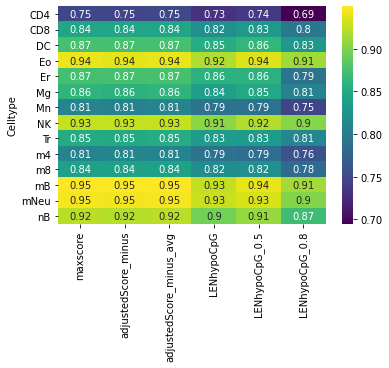

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
ax = sns.heatmap(celltypeAUCdf, annot=True,cmap='viridis')
plt.savefig(outfile+"_Allheyper"+str(consideringALLheyper)+"_AUC.pdf",bbox_inches = "tight")

In [17]:
celltypeAUCdf.to_csv(outfile+"_Allhyper"+str(consideringALLheyper)+"_AUC.txt",sep="\t")
celltypeoptcutpointdf.to_csv(outfile+"_Allhyper"+str(consideringALLheyper)+"_Cutpoint.txt",sep="\t")